In [1]:
'''
This is an attempt to analyse the properties of ER random graphs through graphical analysis
'''
%pylab inline
import pandas as pd
from graph_generation import ER_random_graph as ER
from graph_generation import DPA_random_graph as DPA
from graph_generation import make_complete_graph
from project1 import compute_in_degrees, in_degree_distribution
from application1 import ave_out_degree, citation_graph
def get_sample(num_nodes, num_samples, max_prob=1):
    '''
    Generate a random sample of graphs to analyse.
    
    Arguments:
    num_nodes   -- number of nodes per graph
    num_samples -- number of different probability samples between 0 and 1
    max_prob    -- the samples will be evenly spaced between min_prob and max_prob
    
    Returns:
    A dataframe of the normalised degree distributions for the sample.
    '''
    sample_space = list()
    step_size = (1 / num_samples) * max_prob
    for n in range(1, num_samples):
        sample_space.append(in_degree_distribution(ER(num_nodes, n*step_size, directed=True)))
    df = pd.DataFrame.from_records(sample_space)
    df = df.fillna(0)
    df = df.transpose()
    df.index.name = 'degree'
    df.columns.name = 'graph'
    df.columns = [n * step_size for n in range(1, num_samples)]
    # Normalise to 1
    for col in df:
        df[col] = df[col] / df[col].sum()
    return df

Populating the interactive namespace from numpy and matplotlib
Loaded graph with 27770 nodes
average out degree of the citation graph is: 12.703204897371265


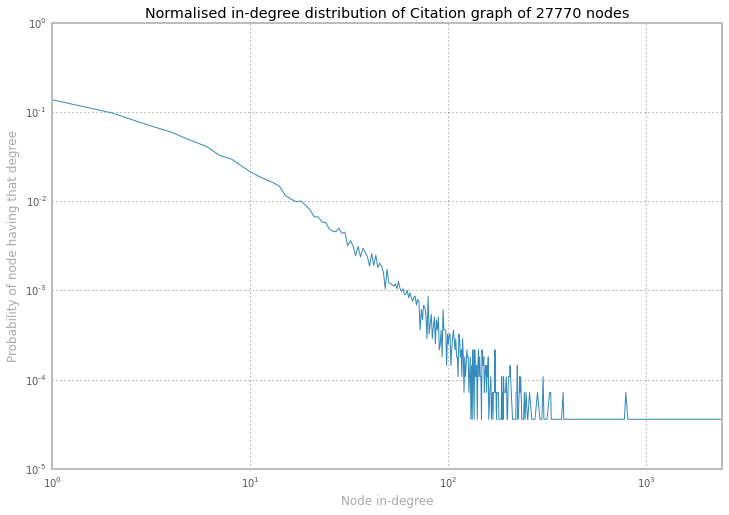

In [19]:
from application1 import distribution as distr

citation_series = pd.Series(distr)
citation_series = citation_series / citation_series.sum()
ax = citation_series.plot(figsize=(12,8),
                          loglog=True,
                          title='Normalised in-degree distribution of Citation graph of 27770 nodes')
ax.set_xlabel('Node in-degree')
ax.set_ylabel('Probability of node having that degree')


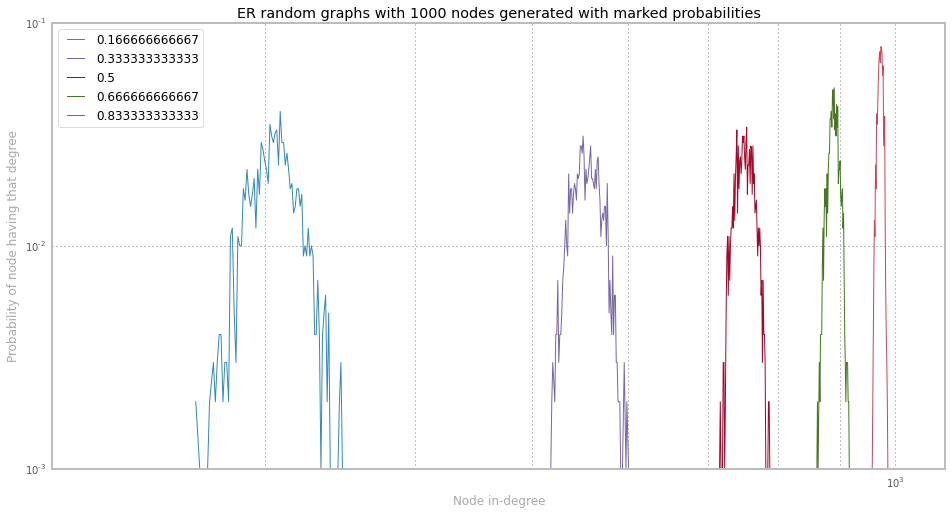

In [20]:
# There are 27770 nodes in the citation graph, so our sample should have a probability scaled to
# the number of nodes to exhibit similar distributions?
NODE_COUNT = 1000
df = get_sample(NODE_COUNT, 6, max_prob=1)
ax = df.plot(figsize=(16,8),
             loglog=True,
             xticks = [x for x in range(200, 1200, 100)],
             title='ER random graphs with {} nodes generated with marked probabilities'.format(NODE_COUNT))
ax.set_xlabel('Node in-degree')
ax.set_ylabel('Probability of node having that degree')
#citation_series.plot(ax=ax)

In [3]:
# Mean out degree for the citation graph
ave_out_degree(citation_graph)

12.703204897371265

In [4]:
# Round down to 12
dpa = DPA(27770, 12)
dpa_dis = in_degree_distribution(dpa)
dpa_s = pd.Series(dpa_dis)

In [6]:
# Round up to 13
dpa2 = DPA(27770, 13)
dpa_dis2 = in_degree_distribution(dpa2)
dpa_s2 = pd.Series(dpa_dis2)

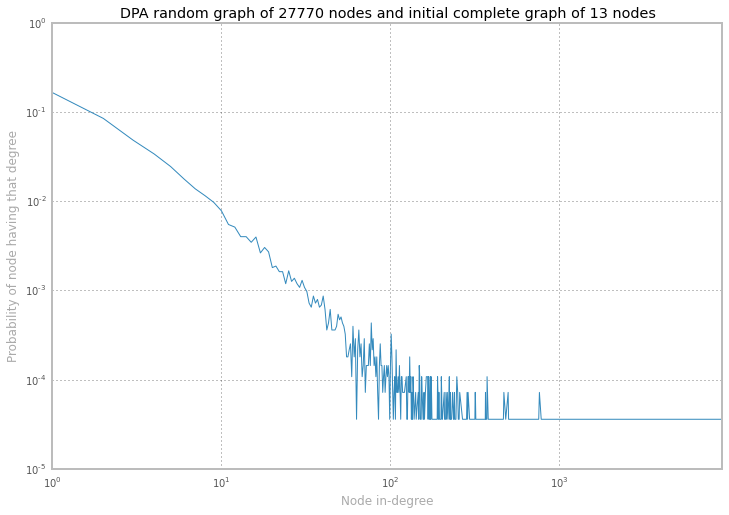

In [18]:
dpa_s = dpa_s / dpa_s.sum()
dpa_s2 = dpa_s2 / dpa_s2.sum()
ax = dpa_s2.plot(figsize=(12,8),
                 loglog=True,
                title='DPA random graph of 27770 nodes and initial complete graph of 13 nodes')
ax.set_xlabel('Node in-degree')
ax.set_ylabel('Probability of node having that degree')
#dpa_s2.plot(ax=ax)